In [2]:
import pandas as pd
from pandas import read_csv
from pandas import read_excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
import koreanize_matplotlib

자치구별 의료기관 리스트 

In [3]:
hopitalDF = pd.read_excel("/home/lkw/dev_ws/Final project/test1.xlsx")
hopitalDF.head()

,의료기관명,기관코드명,시군구코드명,읍면동,주소
0,강북삼성병원,상급종합,종로구,평동,"서울특별시 종로구 새문안로 29, (평동)"
1,건국대학교병원,상급종합,광진구,화양동,"서울특별시 광진구 능동로 120-1, (화양동)"
2,경희대학교병원,상급종합,동대문구,회기동,"서울특별시 동대문구 경희대로 23, (회기동)"
3,고려대학교의과대학부속구로병원,상급종합,구로구,구로동,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)"
4,삼성서울병원,상급종합,강남구,일원동,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)"


In [4]:
gu_counts = hopitalDF.groupby('시군구코드명').size()

# 결과 출력
print(gu_counts)

시군구코드명
강남구     2996
강동구      902
강북구      479
강서구      956
관악구      723
광진구      592
구로구      613
금천구      367
노원구      765
도봉구      383
동대문구     628
동작구      605
마포구      790
서대문구     450
서초구     1501
성동구      485
성북구      562
송파구     1275
양천구      681
영등포구     833
용산구      325
은평구      715
종로구      478
중구       604
중랑구      569
dtype: int64


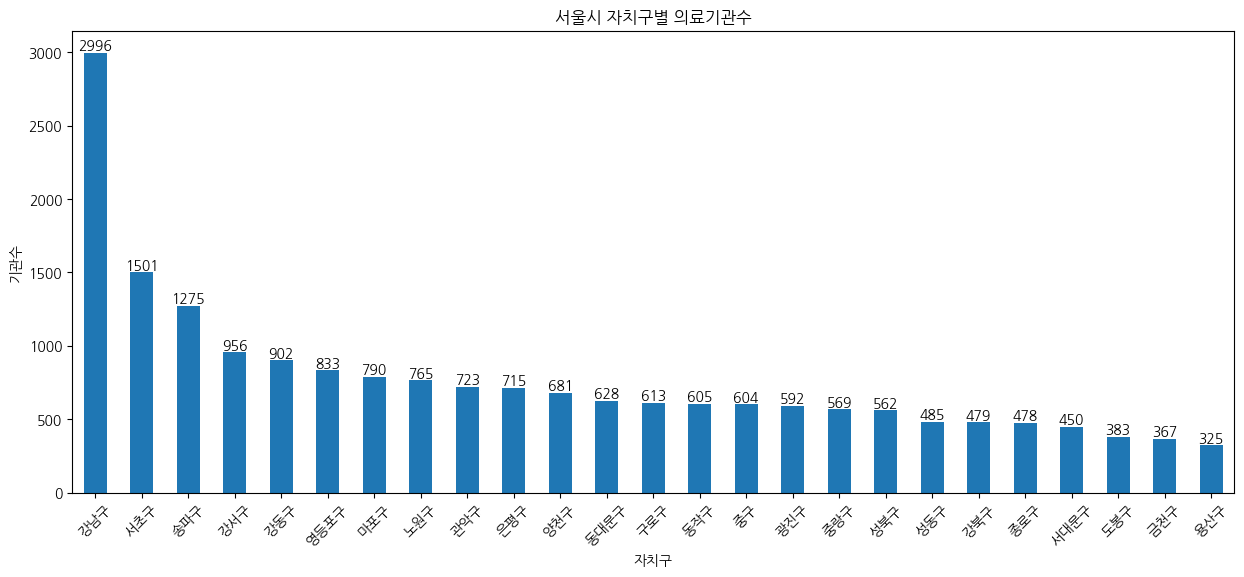

In [5]:

# 바그래프 그리기
ax = gu_counts.sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))

# 그래프 제목과 레이블 설정
plt.title('서울시 자치구별 의료기관수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.ylabel('기관수')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            str(int(i.get_height())), ha='center', va='bottom')

# 그래프 출력
plt.show()

"소아" 키워드가 들어간 의료기관 분류된 DF 생성

In [6]:
kidhospitalDF = hopitalDF[hopitalDF['의료기관명'].str.contains("소아", na=False)]
kidhospitalDF= kidhospitalDF.sort_values(by=['시군구코드명', '읍면동'], ascending=[True, True])
kidhospitalDF = kidhospitalDF.reset_index(drop=True)  # 기존 인덱스 제거
kidhospitalDF.index += 1


In [50]:
kidhospitalDF.head(500)

,의료기관명,기관코드명,시군구코드명,읍면동,주소
1,고만성소아과의원,의원,강남구,개포동,"서울특별시 강남구 개포로 615, 203호 (개포동)"
2,삼성키즈소아청소년과의원,의원,강남구,개포동,"서울특별시 강남구 선릉로 26, JS빌딩 3층 (개포동)"
3,송영명소아과의원,의원,강남구,개포동,"서울특별시 강남구 선릉로10길 5, 2층 (개포동)"
4,연세도우리소아청소년과의원,의원,강남구,개포동,"서울특별시 강남구 삼성로 14, S동 216호, 312호 (개포동, 개포자이 프레지던스)"
5,연세바다소아청소년과의원,의원,강남구,개포동,"서울특별시 강남구 언주로7길 6, 2층 209,210,211-1호 (개포동, 개포자..."
...,...,...,...,...,...
488,신필진소아청소년과의원,의원,중랑구,신내동,"서울특별시 중랑구 신내로 211, 215호 (신내동, 금강리빙스텔)"
489,양수연소아청소년과의원,의원,중랑구,신내동,"서울특별시 중랑구 봉화산로 218, 2층 203호 (신내동)"
490,현엠앤엠소아청소년과의원,의원,중랑구,신내동,"서울특별시 중랑구 신내로 82, 403호 (신내동, 금강프라자)"
491,왕소아과의원,의원,중랑구,중화동,"서울특별시 중랑구 중랑역로 51, 4층 (중화동)"


In [7]:
gukid_counts = kidhospitalDF.groupby('시군구코드명').size()

# 결과 출력
print(gukid_counts)

시군구코드명
강남구     40
강동구     26
강북구      9
강서구     29
관악구     21
광진구     17
구로구     19
금천구     10
노원구     26
도봉구     12
동대문구    16
동작구     19
마포구     22
서대문구    11
서초구     25
성동구     21
성북구     18
송파구     44
양천구     25
영등포구    23
용산구      9
은평구     24
종로구      4
중구       5
중랑구     17
dtype: int64


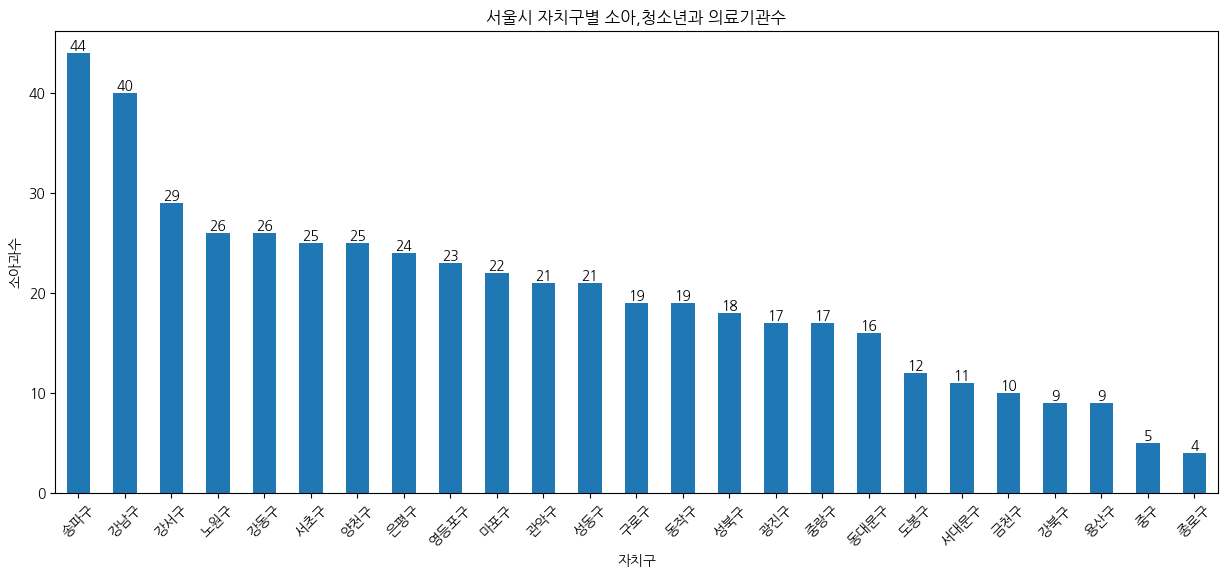

In [52]:
# 바그래프 그리기
ax = gukid_counts.sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))

# 그래프 제목과 레이블 설정
plt.title('서울시 자치구별 소아,청소년과 의료기관수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.ylabel('소아과수')
# 바 상단에 실제 수치 표시
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            str(int(i.get_height())), ha='center', va='bottom')

# 그래프 출력
plt.show()

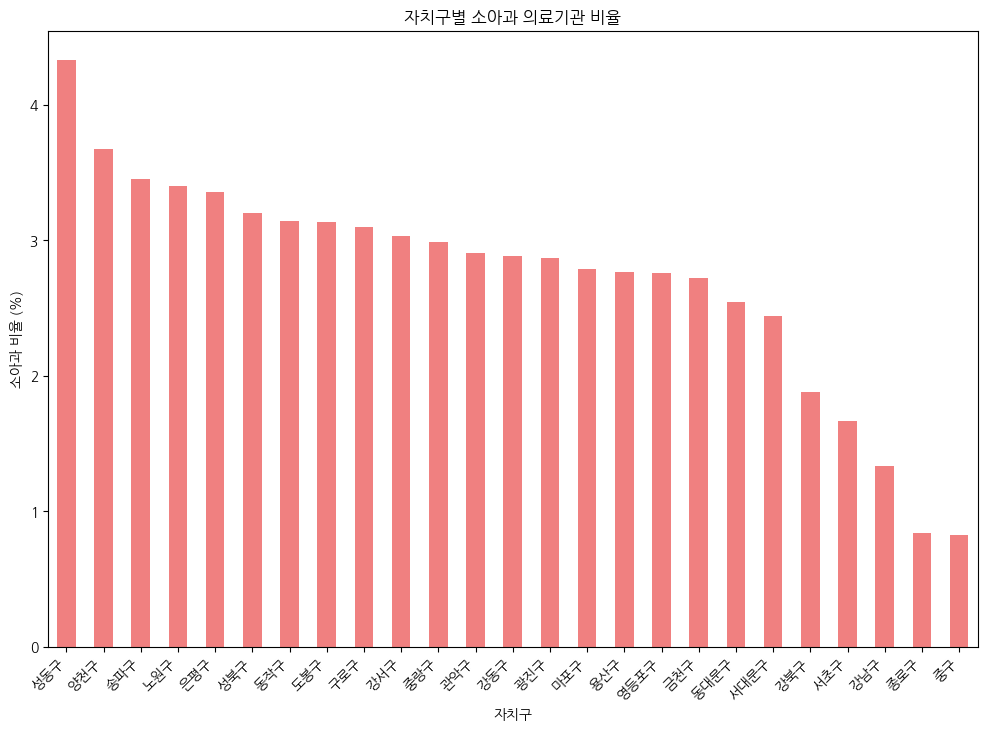

In [8]:
total_hospital_pergu = hopitalDF.groupby("시군구코드명").size()
total_kidhos_pergu= kidhospitalDF.groupby("시군구코드명").size()
hosratio_pergu = (total_kidhos_pergu / total_hospital_pergu) * 100

# 결과를 바그래프로 시각화
plt.figure(figsize=(12, 8))
# hosratio_pergu.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
hosratio_pergu.sort_values(ascending=False).plot(kind='bar', color='lightcoral')


# 그래프 제목과 레이블 설정
plt.title('자치구별 소아과 의료기관 비율')
plt.xlabel('자치구')
plt.ylabel('소아과 비율 (%)')

# x축 라벨을 가로로 표시
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.show()

## 소아과 비율에 인구수 플로팅 

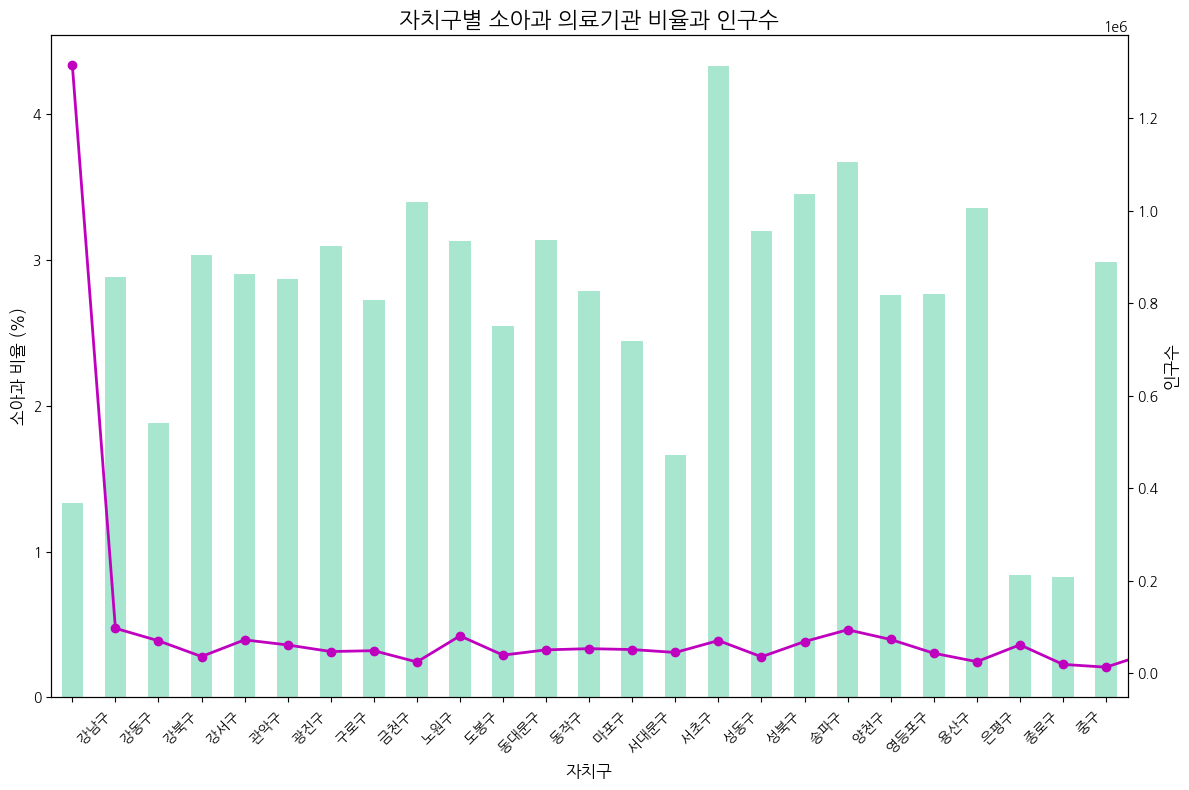

In [10]:
populDF = pd.read_csv("/home/lkw/dev_ws/Final project/202502_서울시연령별인구.csv",encoding="euc-kr")
print(populDF)

                       행정구역 2025년02월_전체 2025년02월_남자 2025년02월_여자 2025년02월_아동전체  \
0       서울특별시  (1100000000)   9,334,828   4,505,412   4,829,416     1,051,796   
1    서울특별시 종로구 (1111000000)     138,277      66,531      71,746        12,750   
2     서울특별시 중구 (1114000000)     120,119      57,833      62,286         9,751   
3    서울특별시 용산구 (1117000000)     203,550      97,264     106,286        20,223   
4    서울특별시 성동구 (1120000000)     273,577     132,290     141,287        29,106   
5    서울특별시 광진구 (1121500000)     331,413     158,888     172,525        31,757   
6   서울특별시 동대문구 (1123000000)     340,709     166,519     174,190        34,646   
7    서울특별시 중랑구 (1126000000)     378,365     185,097     193,268        35,636   
8    서울특별시 성북구 (1129000000)     420,571     201,408     219,163        48,264   
9    서울특별시 강북구 (1130500000)     283,188     136,566     146,622        24,553   
10   서울특별시 도봉구 (1132000000)     302,708     146,292     156,416        29,674   
11   서울특별시 노원구 (1135000000) 

In [175]:
populDF = populDF.drop([0])
print(populDF)

                       행정구역 2025년02월_전체  ... 2025년02월_청년남자 2025년02월_청년여자
1    서울특별시 종로구 (1111000000)     138,277  ...        16,029        17,223
2     서울특별시 중구 (1114000000)     120,119  ...        13,562        15,638
3    서울특별시 용산구 (1117000000)     203,550  ...        23,138        26,300
4    서울특별시 성동구 (1120000000)     273,577  ...        31,751        33,887
5    서울특별시 광진구 (1121500000)     331,413  ...        43,366        47,853
6   서울특별시 동대문구 (1123000000)     340,709  ...        41,647        44,543
7    서울특별시 중랑구 (1126000000)     378,365  ...        39,792        42,032
8    서울특별시 성북구 (1129000000)     420,571  ...        46,303        50,175
9    서울특별시 강북구 (1130500000)     283,188  ...        27,872        29,464
10   서울특별시 도봉구 (1132000000)     302,708  ...        28,927        28,931
11   서울특별시 노원구 (1135000000)     489,683  ...        50,677        49,836
12   서울특별시 은평구 (1138000000)     460,354  ...        46,878        52,453
13  서울특별시 서대문구 (1141000000)     302,097  ...       

In [11]:
kidpopulDF = populDF[['행정구역','2025년02월_청소년전체','2025년02월_청소년남자', '2025년02월_청소년여자'      ]]
print(kidpopulDF)

                       행정구역 2025년02월_청소년전체 2025년02월_청소년남자 2025년02월_청소년여자
0       서울특별시  (1100000000)      1,315,169        648,810        666,359
1    서울특별시 종로구 (1111000000)         18,794          8,916          9,878
2     서울특별시 중구 (1114000000)         12,766          6,078          6,688
3    서울특별시 용산구 (1117000000)         24,641         11,836         12,805
4    서울특별시 성동구 (1120000000)         35,175         16,972         18,203
5    서울특별시 광진구 (1121500000)         46,565         22,404         24,161
6   서울특별시 동대문구 (1123000000)         50,213         23,814         26,399
7    서울특별시 중랑구 (1126000000)         43,364         21,538         21,826
8    서울특별시 성북구 (1129000000)         68,136         32,613         35,523
9    서울특별시 강북구 (1130500000)         35,791         17,192         18,599
10   서울특별시 도봉구 (1132000000)         38,792         19,565         19,227
11   서울특별시 노원구 (1135000000)         80,424         41,083         39,341
12   서울특별시 은평구 (1138000000)         61,117         

In [12]:

kidpopulDF.columns = ['행정구', '청소년인구', '청소년남자수','청소년여자수']

In [13]:
seoultotalpop = 9334828

In [14]:
# '내용' 컬럼에서 괄호 안의 숫자 및 '안녕하세요' 단어 제거
kidpopulDF['행정구'] = kidpopulDF['행정구'].str.replace(r'\(.*?\)', '', regex=True)  
kidpopulDF['행정구'] = kidpopulDF['행정구'].str.replace('서울특별시', '', regex=False)  
print(kidpopulDF)

       행정구      청소년인구   청소년남자수   청소년여자수
0           1,315,169  648,810  666,359
1     종로구      18,794    8,916    9,878
2      중구      12,766    6,078    6,688
3     용산구      24,641   11,836   12,805
4     성동구      35,175   16,972   18,203
5     광진구      46,565   22,404   24,161
6    동대문구      50,213   23,814   26,399
7     중랑구      43,364   21,538   21,826
8     성북구      68,136   32,613   35,523
9     강북구      35,791   17,192   18,599
10    도봉구      38,792   19,565   19,227
11    노원구      80,424   41,083   39,341
12    은평구      61,117   30,375   30,742
13   서대문구      44,547   20,828   23,719
14    마포구      50,862   23,851   27,011
15    양천구      72,606   37,390   35,216
16    강서구      71,830   35,314   36,516
17    구로구      48,425   24,208   24,217
18    금천구      24,008   11,702   12,306
19   영등포구      42,923   20,922   22,001
20    동작구      52,774   25,877   26,897
21    관악구      60,789   28,822   31,967
22    서초구      70,304   34,934   35,370
23    강남구      96,859   49,524   47,335


/tmp/ipykernel_17683/2520739988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidpopulDF['행정구'] = kidpopulDF['행정구'].str.replace(r'\(.*?\)', '', regex=True)
/tmp/ipykernel_17683/2520739988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidpopulDF['행정구'] = kidpopulDF['행정구'].str.replace('서울특별시', '', regex=False)


In [15]:
kidpopulDF[['청소년인구', '청소년남자수','청소년여자수']] = kidpopulDF[['청소년인구', '청소년남자수','청소년여자수']].replace({',': ''}, regex=True).astype(int)

/tmp/ipykernel_17683/3075174777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidpopulDF[['청소년인구', '청소년남자수','청소년여자수']] = kidpopulDF[['청소년인구', '청소년남자수','청소년여자수']].replace({',': ''}, regex=True).astype(int)


In [16]:
kidpopulDF.info()
print(kidpopulDF)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구     26 non-null     object
 1   청소년인구   26 non-null     int64 
 2   청소년남자수  26 non-null     int64 
 3   청소년여자수  26 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes
       행정구    청소년인구  청소년남자수  청소년여자수
0           1315169  648810  666359
1     종로구     18794    8916    9878
2      중구     12766    6078    6688
3     용산구     24641   11836   12805
4     성동구     35175   16972   18203
5     광진구     46565   22404   24161
6    동대문구     50213   23814   26399
7     중랑구     43364   21538   21826
8     성북구     68136   32613   35523
9     강북구     35791   17192   18599
10    도봉구     38792   19565   19227
11    노원구     80424   41083   39341
12    은평구     61117   30375   30742
13   서대문구     44547   20828   23719
14    마포구     50862   23851   27011
15    양천구     72606   37390   35216
16    강서구     7

In [21]:
total_kidpop_pergu = kidpopulDF.sort_values(by='행정구')
total_kidpop_pergu = total_kidpop_pergu.reset_index(drop=True)  # 기존 인덱스 제거
total_kidpop_pergu.index += 1

print(total_kidpop_pergu)
# total_kidhos_pergu= kidhospitalDF.groupby("시군구코드명").size()

       행정구    청소년인구  청소년남자수  청소년여자수
1           1315169  648810  666359
2     강남구     96859   49524   47335
3     강동구     69805   36122   33683
4     강북구     35791   17192   18599
5     강서구     71830   35314   36516
6     관악구     60789   28822   31967
7     광진구     46565   22404   24161
8     구로구     48425   24208   24217
9     금천구     24008   11702   12306
10    노원구     80424   41083   39341
11    도봉구     38792   19565   19227
12   동대문구     50213   23814   26399
13    동작구     52774   25877   26897
14    마포구     50862   23851   27011
15   서대문구     44547   20828   23719
16    서초구     70304   34934   35370
17    성동구     35175   16972   18203
18    성북구     68136   32613   35523
19    송파구     93659   46930   46729
20    양천구     72606   37390   35216
21   영등포구     42923   20922   22001
22    용산구     24641   11836   12805
23    은평구     61117   30375   30742
24    종로구     18794    8916    9878
25     중구     12766    6078    6688
26    중랑구     43364   21538   21826


In [40]:
total_kid = total_kidpop_pergu.groupby("행정구")['청소년인구'].sum()
# print(total_kid)
print(total_kid.drop(total_kid.index[0]))
total_kid=total_kid.drop(total_kid.index[0])

행정구
강남구      96859
강동구      69805
강북구      35791
강서구      71830
관악구      60789
광진구      46565
구로구      48425
금천구      24008
노원구      80424
도봉구      38792
동대문구     50213
동작구      52774
마포구      50862
서대문구     44547
서초구      70304
성동구      35175
성북구      68136
송파구      93659
양천구      72606
영등포구     42923
용산구      24641
은평구      61117
종로구      18794
중구       12766
중랑구      43364
Name: 청소년인구, dtype: int64


In [41]:
print(total_kid)

행정구
강남구      96859
강동구      69805
강북구      35791
강서구      71830
관악구      60789
광진구      46565
구로구      48425
금천구      24008
노원구      80424
도봉구      38792
동대문구     50213
동작구      52774
마포구      50862
서대문구     44547
서초구      70304
성동구      35175
성북구      68136
송파구      93659
양천구      72606
영등포구     42923
용산구      24641
은평구      61117
종로구      18794
중구       12766
중랑구      43364
Name: 청소년인구, dtype: int64


In [ ]:
# total_kid_ratio = (total_kid / seoultotalpop)*100
# print(total_kid_ratio)


행정구
         14.088840
강남구       1.037609
강동구       0.747791
강북구       0.383414
강서구       0.769484
관악구       0.651206
광진구       0.498831
구로구       0.518756
금천구       0.257187
노원구       0.861548
도봉구       0.415562
동대문구      0.537910
동작구       0.565345
마포구       0.544863
서대문구      0.477213
서초구       0.753137
성동구       0.376815
성북구       0.729912
송파구       1.003329
양천구       0.777797
영등포구      0.459816
용산구       0.263968
은평구       0.654720
종로구       0.201332
중구        0.136757
중랑구       0.464540
Name: 청소년인구, dtype: float64


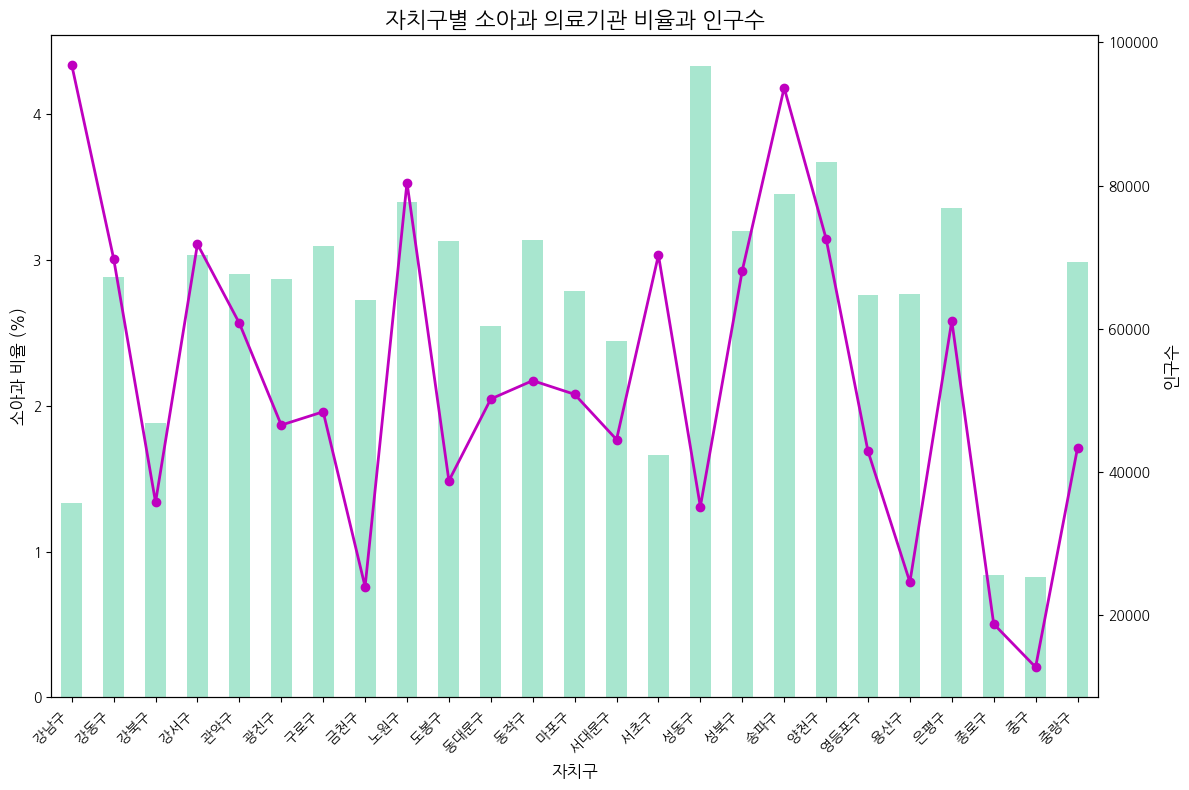

In [42]:
# 두 개의 그래프를 하나의 플롯에 그리기
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 그래프: 소아과 의료기관 비율
hosratio_pergu.plot(kind='bar', color='#A8E6CF', ax=ax1)
ax1.set_title('자치구별 소아과 의료기관 비율과 인구수', fontsize=16)
ax1.set_xlabel('자치구', fontsize=12)
ax1.set_ylabel('소아과 비율 (%)', fontsize=12)
ax1.set_xticklabels(hosratio_pergu.index, rotation=45, ha='right')

# 두 번째 그래프: 자치구별 인구수 (두 번째 y축)
ax2 = ax1.twinx()
total_kid.plot(kind='line', color='m', ax=ax2, marker='o', linewidth=2)
ax2.set_ylabel('인구수', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()